In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.DataFrame.from_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

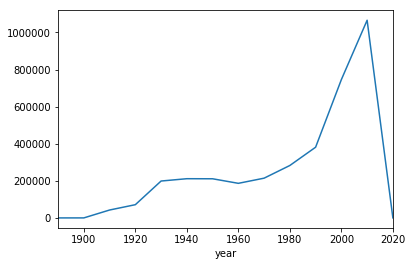

In [4]:
cast.groupby(cast.year // 10 * 10).size().plot()

### Use groupby() to plot the number of "Hamlet" films made each decade.

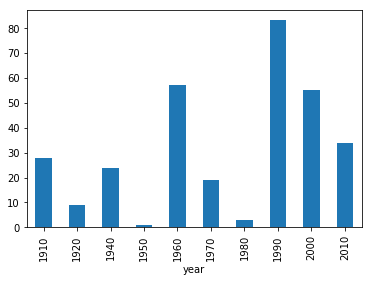

In [6]:
cast[cast.title == 'Hamlet'].groupby(cast.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [9]:
cast[(cast.n == 1) & (cast.year // 10 * 10 == 1950)].groupby(['year','type']).size().unstack()

type,actor,actress
year,,
1950,621,279
1951,647,279
1952,606,291
1953,652,300
1954,634,308
1955,639,281
1956,642,304
1957,734,301
1958,704,293


### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [15]:
cast[(cast.year // 10 * 10 == 1950) & (cast.n >= 1) & (cast.n <= 5)].groupby('n').size()

n
1.0    9552
2.0    9094
3.0    8711
4.0    8419
5.0    8137
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [20]:
cast[cast.title.str.find('Pink Panther') > 0].groupby(['title','year']).size()

title                           year
Curse of the Pink Panther       1983    67
Revenge of the Pink Panther     1978    64
Son of the Pink Panther         1993    46
The Pink Panther                1963    20
                                2006    90
The Pink Panther 2              2009    84
The Pink Panther Strikes Again  1976    68
The Return of the Pink Panther  1975    30
Trail of the Pink Panther       1982    41
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [33]:
fo = cast[cast.name == 'Frank Oz'].groupby(['year','title']).size()
fo[fo > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [34]:
fo = cast[cast.name == 'Frank Oz'].groupby(['character']).size()
fo[fo > 1]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64